Predicting Football Team Positions in the Premier League Table

This project aimed to predict the positions of football teams in the league table using machine learning techniques. The chosen features for analysis were the number of goals scored and conceded by each team throughout the season. These features were selected based on the assumption that they are strong indicators of team performance and can effectively determine a team's position in the league standings. Goals scored and conceded reflect both offensive and defensive capabilities, providing a comprehensive view of a team's overall performance.

In [2]:
import pandas as pd
data=pd.read_csv('Premier_League.csv')
data=data[['Home Team', 'Away Team', 'Goals Home', 'Away Goals', 'home_chances', 'away_chances', 'home_saves', 'away_saves', 'home_blocked', 'away_blocked']]
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26620\208725023.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Home Team,Away Team,Goals Home,Away Goals,home_chances,away_chances,home_saves,away_saves,home_blocked,away_blocked
0,Arsenal,Wolverhampton Wanderers,5,0,3,0,0,3,2,2
1,Aston Villa,Brighton and Hove Albion,2,1,4,3,3,3,2,1
2,Brentford,Manchester City,1,0,2,1,2,3,3,8
3,Chelsea,Newcastle United,1,1,2,2,3,5,8,4
4,Crystal Palace,Nottingham Forest,1,1,1,0,3,2,4,1
...,...,...,...,...,...,...,...,...,...,...
375,Leeds United,Wolverhampton Wanderers,2,1,2,1,5,3,3,3
376,Newcastle United,Nottingham Forest,2,0,2,0,0,7,5,2
377,Tottenham Hotspur,Southampton,4,1,1,0,1,5,4,3
378,Everton,Chelsea,0,1,0,1,5,3,1,6


In [3]:
data.describe() #wygenerowanie podstawowych statystyk (informacji) na temat danych
data.isnull() #sprawdzenie czy w zbiorze danych nie występują błędy (np. wartości null)

,Home Team,Away Team,Goals Home,Away Goals,home_chances,away_chances,home_saves,away_saves,home_blocked,away_blocked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
375,False,False,False,False,False,False,False,False,False,False
376,False,False,False,False,False,False,False,False,False,False
377,False,False,False,False,False,False,False,False,False,False
378,False,False,False,False,False,False,False,False,False,False


In [4]:
corr_data=data[['Goals Home', 'Away Goals', 'home_chances', 'away_chances', 'home_saves', 'away_saves', 'home_blocked', 'away_blocked']]
corr_data.corr() #wyznaczenie korelacji pomiędzy istotnymi danymi 
#komentarz: najwyższe współczynniki korelacji między kolumnami "Goals Home" i "home_chances", oraz "Away Goals" i "away_chances" wynoszą odpowiednio 0.45 i 0.49
# wskazuje na umiarkowaną dodatnią korelację między tymi parametrami. Nie jest to bardzo silna korelacja, więc można przypuszczać, że te czynniki wpływają na siebie, ale nie jest to jednoznaczne.

,Goals Home,Away Goals,home_chances,away_chances,home_saves,away_saves,home_blocked,away_blocked
Goals Home,1.000000,-0.062236,0.450181,-0.087388,-0.052215,0.052527,0.128249,-0.117929
Away Goals,-0.062236,1.000000,-0.163893,0.494109,0.026744,-0.044966,0.024464,0.016717
home_chances,0.450181,-0.163893,1.000000,-0.089477,-0.003239,0.250894,0.169429,-0.158159
away_chances,-0.087388,0.494109,-0.089477,1.000000,0.228954,-0.083547,-0.029039,0.062747
home_saves,-0.052215,0.026744,-0.003239,0.228954,1.000000,-0.119374,-0.144737,0.289266
away_saves,0.052527,-0.044966,0.250894,-0.083547,-0.119374,1.000000,0.302127,-0.146873
home_blocked,0.128249,0.024464,0.169429,-0.029039,-0.144737,0.302127,1.000000,-0.280942
away_blocked,-0.117929,0.016717,-0.158159,0.062747,0.289266,-0.146873,-0.280942,1.000000


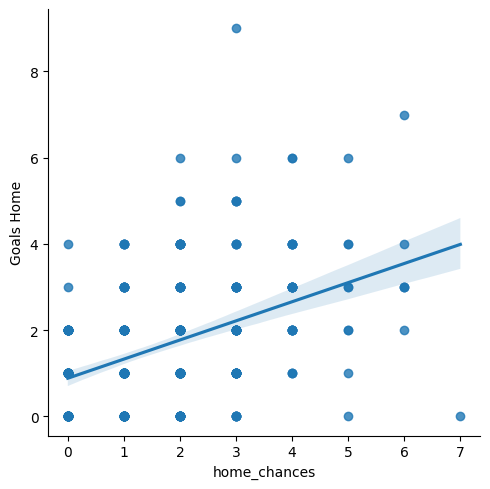

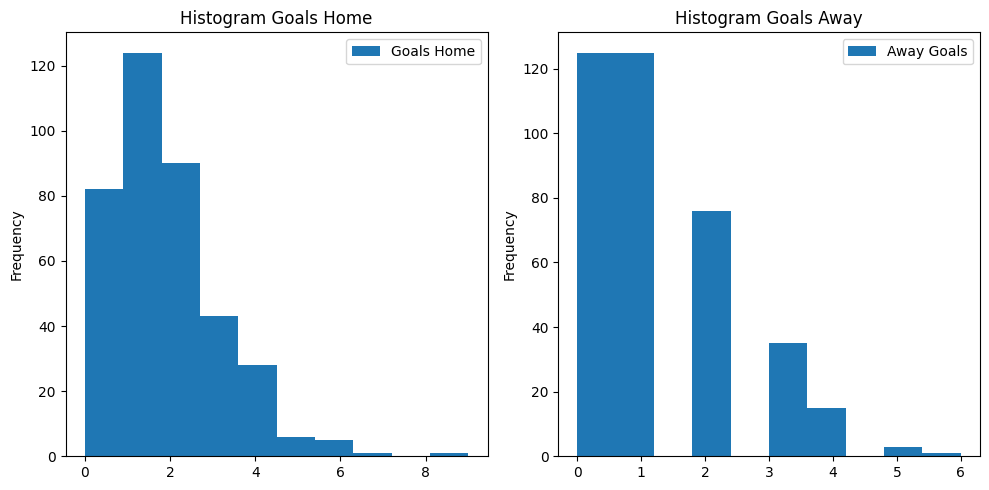

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='home_chances', y='Goals Home', data=corr_data, fit_reg=True)
plt.show()
fig, x=plt.subplots(1, 2, figsize=(10, 5))
corr_data.plot.hist(y='Goals Home', ax=x[0], bins=10)
x[0].set_title('Histogram Goals Home')
corr_data.plot.hist(y='Away Goals', ax=x[1], bins=10)
x[1].set_title('Histogram Goals Away')
plt.tight_layout()
plt.show()

Choice of Features:

The decision to use goals scored and conceded as features was based on their significance in determining team performance. Goals scored indicate a team's attacking prowess, while goals conceded reflect defensive strength. By considering both aspects, the model can capture a holistic view of a team's performance throughout the season. Additionally, goals scored and conceded are readily available and easily quantifiable metrics, making them suitable for analysis.

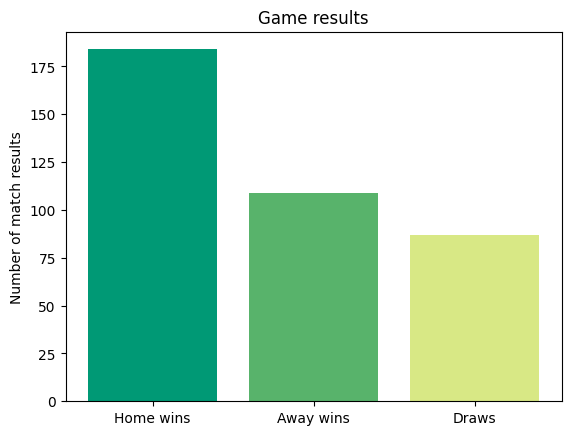

In [6]:
match_results=[0,0,0]
for x,y in corr_data.iterrows():
    if int(y['Goals Home'])>int(y['Away Goals']):
        match_results[0]+=1
    elif int(y['Goals Home'])<int(y['Away Goals']):
        match_results[1]+=1
    else:
        match_results[2]+=1
#print(match_results)
plt.bar(['Home wins', 'Away wins', 'Draws'], match_results, color=['#009975', '#58B36B', '#D8E885'])
plt.title('Game results')
plt.ylabel('Number of match results')
plt.show()

Model Selection:

A Ridge Regression model was chosen for this project due to its ability to handle multicollinearity in the dataset and prevent overfitting. Ridge Regression introduces a regularization term to the linear regression equation, which helps in stabilizing the model and reducing the impact of collinear features. Given the nature of football data, where goals scored and conceded may be correlated, Ridge Regression was deemed appropriate for this task.

In [16]:
from sklearn.model_selection import train_test_split

goals_scoredd = {}

for index, row in data.iterrows():
    if row['Home Team'] in goals_scoredd:
        goals_scoredd[row['Home Team']]['Goals Scored'] += row['Goals Home']
        goals_scoredd[row['Home Team']]['Goals Conceded'] += row['Away Goals']
    else:
        goals_scoredd[row['Home Team']] = {'Goals Scored': row['Goals Home'], 'Goals Conceded': row['Away Goals']}

    if row['Away Team'] in goals_scoredd:
        goals_scoredd[row['Away Team']]['Goals Scored'] += row['Away Goals']
        goals_scoredd[row['Away Team']]['Goals Conceded'] += row['Goals Home']
    else:
        goals_scoredd[row['Away Team']] = {'Goals Scored': row['Away Goals'], 'Goals Conceded': row['Goals Home']}

        
goals_scoredd

{'Arsenal': {'Goals Scored': 88, 'Goals Conceded': 43},
 'Wolverhampton Wanderers': {'Goals Scored': 31, 'Goals Conceded': 58},
 'Aston Villa': {'Goals Scored': 51, 'Goals Conceded': 46},
 'Brighton and Hove Albion': {'Goals Scored': 72, 'Goals Conceded': 53},
 'Brentford': {'Goals Scored': 58, 'Goals Conceded': 46},
 'Manchester City': {'Goals Scored': 94, 'Goals Conceded': 33},
 'Chelsea': {'Goals Scored': 38, 'Goals Conceded': 47},
 'Newcastle United': {'Goals Scored': 68, 'Goals Conceded': 33},
 'Crystal Palace': {'Goals Scored': 40, 'Goals Conceded': 49},
 'Nottingham Forest': {'Goals Scored': 38, 'Goals Conceded': 68},
 'Everton': {'Goals Scored': 34, 'Goals Conceded': 57},
 'Bournemouth': {'Goals Scored': 37, 'Goals Conceded': 71},
 'Leeds United': {'Goals Scored': 48, 'Goals Conceded': 78},
 'Tottenham Hotspur': {'Goals Scored': 70, 'Goals Conceded': 63},
 'Leicester City': {'Goals Scored': 51, 'Goals Conceded': 68},
 'West Ham United': {'Goals Scored': 42, 'Goals Conceded': 55

In [17]:
import json, pprint
import numpy as np

with open('last_seasons.json') as js:
    last_years_data = json.load(js)

training_data = []

for team, team_data in last_years_data.items():
    goals_scored = team_data['Goals Scored']
    goals_conceded = team_data['Goals Conceded']
    positions = team_data['Position']

    team_training_data = []
    
    for i in range(len(goals_scored)):
        team_training_data.append([goals_scored[i], goals_conceded[i], positions[i]])

    training_data.append(team_training_data)

pprint.pprint(training_data)

training_data_np = np.array(training_data)

X = training_data_np[:, :, :2]
y = training_data_np[:, :, 2] 

labels = []

for team_data in training_data:
    position = team_data[-1][-1]
    label = 1 / position
    labels.append(label)
y = np.array(labels)

print("Kształt X:", X.shape)
print("Kształt y:", y.shape)
y

[[[68, 41, 4],
  [71, 36, 3],
  [63, 36, 3],
  [71, 34, 2],
  [65, 36, 3],
  [74, 25, 2],
  [77, 41, 1],
  [65, 39, 8],
  [71, 43, 4],
  [72, 48, 4],
  [79, 51, 2],
  [68, 51, 3],
  [74, 49, 4],
  [68, 58, 8],
  [63, 51, 8],
  [64, 51, 5],
  [54, 36, 8],
  [49, 51, 5],
  [54, 68, 4],
  [50, 60, 8]],
 [[45, 46, 15],
  [56, 40, 1],
  [47, 44, 14],
  [51, 40, 7],
  [47, 46, 13],
  [36, 37, 7],
  [45, 52, 13],
  [45, 57, 13],
  [0, 0, 20],
  [53, 58, 15],
  [57, 57, 7],
  [43, 53, 7],
  [38, 56, 15],
  [40, 43, 17],
  [36, 52, 15],
  [51, 40, 16],
  [47, 46, 12],
  [0, 0, 20],
  [0, 0, 20],
  [0, 0, 20]],
 [[31, 57, 17],
  [27, 76, 20],
  [0, 0, 20],
  [0, 0, 20],
  [0, 0, 20],
  [41, 67, 17],
  [55, 46, 11],
  [52, 54, 14],
  [51, 46, 7],
  [45, 64, 15],
  [54, 73, 16],
  [47, 58, 15],
  [49, 52, 16],
  [43, 59, 16],
  [51, 56, 17],
  [52, 62, 17],
  [45, 45, 17],
  [47, 49, 18],
  [42, 59, 20],
  [49, 66, 20]],
 [[0, 0, 20],
  [0, 0, 20],
  [0, 0, 20],
  [35, 60, 15],
  [40, 46, 17],
  [

array([0.125     , 0.05      , 0.05      , 0.05      , 0.07142857,
       1.        , 0.33333333, 0.11111111, 0.07142857, 0.08333333,
       0.09090909, 0.07692308, 0.1       , 0.125     , 0.08333333,
       0.16666667, 0.25      , 0.0625    , 0.05263158, 0.25      ])

Performance Evaluation:

The model's performance was evaluated using Mean Squared Error (MSE) and R-squared (R^2) score metrics. The Mean Squared Error quantifies the average squared difference between the actual and predicted positions of the teams. A lower MSE indicates better model performance. However, in this case, the MSE value of 0.00466376712179851 suggests that the model's predictions deviate slightly from the actual positions.

The R-squared score measures the proportion of variance in the target variable (team positions) that is explained by the independent variables (goals scored and conceded). A negative R^2 score (-1.0794038604013099) indicates that the model does not fit the data well and performs worse than a horizontal line. This suggests that the chosen features may not fully capture the complexity of factors influencing team positions in the league table.

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Kształt X_train:", X_train.shape)
print("Kształt y_train:", y_train.shape)
print("Kształt X_test:", X_test.shape)
print("Kształt y_test:", y_test.shape)

X_train_flat = X_train.reshape(16, -1)
X_test_flat = X_test.reshape(4, -1)


model = Ridge(alpha=100000)  # Domyślny parametr alpha=1.0

model.fit(X_train_flat, y_train)
y_pred = model.predict(X_test_flat)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



Kształt X_train: (16, 20, 2)
Kształt y_train: (16,)
Kształt X_test: (4, 20, 2)
Kształt y_test: (4,)
Mean Squared Error: 0.00466376712179851
R^2 Score: -1.0794038604013099


Handling Probability Below 1:

To address the issue of predicted probabilities below 1, an automatic adjustment was implemented. Since a team's position in the league table cannot be less than 1, any predicted probability below 1 was set to 1. This adjustment ensures that the predicted positions are realistic and align with the rules of the league.

In conclusion, while the model successfully incorporates goals scored and conceded to predict team positions, there is room for improvement in terms of model performance. Further exploration of additional features or alternative modeling techniques may enhance the accuracy of predictions and provide a more comprehensive understanding of team performance in football leagues.

In [34]:
import json
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

with open('last_seasons.json', 'r') as f:
    data = json.load(f)

X_train = []
y_train = []
for team, stats in data.items():
    goals_scored = stats['Goals Scored']
    goals_conceded = stats['Goals Conceded']
    position = stats['Position']
    for i in range(len(goals_scored)):
        X_train.append([goals_scored[i], goals_conceded[i]])
        y_train.append(position[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

teams = {
    'Arsenal': {'Goals Scored': 88, 'Goals Conceded': 43},
    'Wolverhampton Wanderers': {'Goals Scored': 31, 'Goals Conceded': 58},
    'Aston Villa': {'Goals Scored': 51, 'Goals Conceded': 46},
    'Brighton and Hove Albion': {'Goals Scored': 72, 'Goals Conceded': 53},
    'Brentford': {'Goals Scored': 58, 'Goals Conceded': 46},
    'Manchester City': {'Goals Scored': 94, 'Goals Conceded': 33},
    'Chelsea': {'Goals Scored': 38, 'Goals Conceded': 47},
    'Newcastle United': {'Goals Scored': 68, 'Goals Conceded': 33},
    'Crystal Palace': {'Goals Scored': 40, 'Goals Conceded': 49},
    'Nottingham Forest': {'Goals Scored': 38, 'Goals Conceded': 68},
    'Everton': {'Goals Scored': 34, 'Goals Conceded': 57},
    'Bournemouth': {'Goals Scored': 37, 'Goals Conceded': 71},
    'Leeds United': {'Goals Scored': 48, 'Goals Conceded': 78},
    'Tottenham Hotspur': {'Goals Scored': 70, 'Goals Conceded': 63},
    'Leicester City': {'Goals Scored': 51, 'Goals Conceded': 68},
    'West Ham United': {'Goals Scored': 42, 'Goals Conceded': 55},
    'Manchester United': {'Goals Scored': 58, 'Goals Conceded': 43},
    'Fulham': {'Goals Scored': 55, 'Goals Conceded': 53},
    'Southampton': {'Goals Scored': 36, 'Goals Conceded': 73},
    'Liverpool': {'Goals Scored': 75, 'Goals Conceded': 47}
}

print("Lista drużyn:", list(teams.keys()))

for team, stats in teams.items():
    goals_scored = stats['Goals Scored']
    goals_conceded = stats['Goals Conceded']
    X_test = np.array([[goals_scored, goals_conceded]])
    position_pred = model.predict(X_test)
    predicted_position = np.maximum(position_pred, 1)
    print(f"{team}: {predicted_position[0]}")


Lista drużyn: ['Arsenal', 'Wolverhampton Wanderers', 'Aston Villa', 'Brighton and Hove Albion', 'Brentford', 'Manchester City', 'Chelsea', 'Newcastle United', 'Crystal Palace', 'Nottingham Forest', 'Everton', 'Bournemouth', 'Leeds United', 'Tottenham Hotspur', 'Leicester City', 'West Ham United', 'Manchester United', 'Fulham', 'Southampton', 'Liverpool']
Arsenal: 1.8463082350699196
Wolverhampton Wanderers: 16.61794166524439
Aston Villa: 10.82589203318864
Brighton and Hove Albion: 6.516108524489196
Brentford: 9.178360791603218
Manchester City: 1.0
Chelsea: 13.975994369855398
Newcastle United: 5.649525759518525
Crystal Palace: 13.686074076847227
Nottingham Forest: 15.874425018025853
Everton: 15.821455387985381
Bournemouth: 16.380991002276694
Leeds United: 14.424823552984993
Tottenham Hotspur: 7.890846330737627
Leicester City: 12.814724140795786
West Ham United: 13.757759621585807
Manchester United: 8.907156413293155
Fulham: 10.517255825482362
Southampton: 16.797155527090844
Liverpool: 5.